In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm  
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [116]:
d = {
    'age': [10, 14, 24, 34, 54, 64, 84, 84, 84, 84], 
    'salary': [1, 1, 10000,25000, 50000, 60000, 80000, 800000000, 800000000, 80000000000]
}
df = pd.DataFrame(data=d)
df

# sum(d['salary'])/len(d['salary'])

,age,salary
0,10,1
1,14,1
2,24,10000
3,34,25000
4,54,50000
5,64,60000
6,84,80000
7,84,800000000
8,84,800000000
9,84,80000000000


In [80]:
df['age'].quantile(0.75), df['age'].quantile(0.25)

(84.0, 26.5)

In [81]:
IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)
IQR

57.5

In [82]:
df._get_numeric_data()

,age,salary
0,10,0
1,14,0
2,24,10000
3,34,25000
4,54,50000
5,64,60000
6,84,80000
7,84,80000
8,84,80000
9,84,80000


In [117]:
df._get_numeric_data().skew(axis=0)

age      -0.308886
salary    3.161252
dtype: float64

In [84]:
# skewness = num.skew(axis=0).sort_values(ascending=False)

<AxesSubplot:xlabel='age', ylabel='salary'>

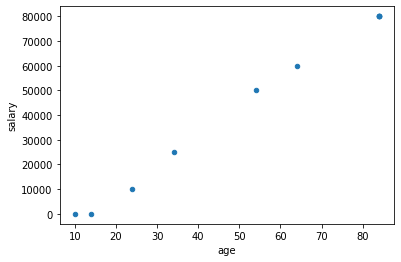

In [85]:
df.plot(x ='age', y='salary', kind = 'scatter')

<AxesSubplot:ylabel='Frequency'>

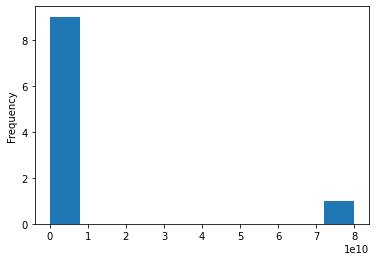

In [107]:
df.salary.plot(kind='hist', density=False)

In [111]:
df[list(df._get_numeric_data())] = np.log(
    df[list(df._get_numeric_data())])

In [118]:
p = PowerTransformer()
p

PowerTransformer()

In [119]:
p1 = p.fit(df[list(df._get_numeric_data())])
p1

PowerTransformer()

In [120]:
df[list(df._get_numeric_data())] = pd.DataFrame(p1.transform(
    df[list(df._get_numeric_data())]), columns=list(df._get_numeric_data()))

In [113]:
df

,age,salary
0,2.302585,0.000000
1,2.639057,0.000000
2,3.178054,9.210340
3,3.526361,10.126631
4,3.988984,10.819778
5,4.158883,11.002100
6,4.430817,11.289782
7,4.430817,20.500122
8,4.430817,20.500122
9,4.430817,25.105292


In [121]:
df._get_numeric_data().skew(axis=0)

age      -0.393641
salary    0.022585
dtype: float64

<AxesSubplot:ylabel='Frequency'>

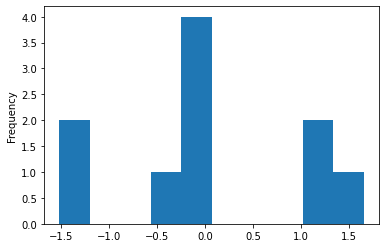

In [122]:
df.salary.plot(kind='hist', density=False)